In [25]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Objecitve of Analysis

- Understand the dataset
- Clean the dataset if is not cleaned
- Once Dataset is ready try to answer following questions

1. What is overall sales trend?
2. Which are top 10 products by sales?
3. Which are the most selling products(quantity)?
4. Which is most preferred shiping method?
5. Which are the most profitable categories and suh categories?
6. Which are the least profitable categories and suh categories?
7. Which are bottom 10 products by sales?
8. Which are the least selling products(quantity)?

### Step 1: Load Dataset

In [26]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [27]:
df=pd.read_excel("/home/bjg/Downloads/superstore_sales.xlsx")
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2.0,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3.0,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4.0,NaN,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3.0,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5.0,0.1,37.770,4.70,Medium,2011


In [28]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2.0,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1.0,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3.0,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1.0,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3.0,0.2,-0.6048,0.170,Medium,2014


### Step 2: Clean and preprocess the dataset

In [29]:
# Check the shape of dataset
df.shape

(51290, 21)

In [30]:
# understand all the columns
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [31]:
# chekc dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [32]:
# Check for the duplicate records and if you found drop it
df=df.drop_duplicates()
df.shape

(51290, 21)

In [33]:
# check missing values
df.isna().sum() # df.isnull().sum()

order_id           0
order_date         0
ship_date          0
ship_mode          0
customer_name      0
segment            0
state              0
country            0
market             0
region             0
product_id         0
category           0
sub_category       0
product_name       0
sales              0
quantity          11
discount          13
profit             0
shipping_cost      0
order_priority     4
year               0
dtype: int64

In [34]:
# check missing value percentage
df.isna().sum()/len(df)*100

order_id          0.000000
order_date        0.000000
ship_date         0.000000
ship_mode         0.000000
customer_name     0.000000
segment           0.000000
state             0.000000
country           0.000000
market            0.000000
region            0.000000
product_id        0.000000
category          0.000000
sub_category      0.000000
product_name      0.000000
sales             0.000000
quantity          0.021447
discount          0.025346
profit            0.000000
shipping_cost     0.000000
order_priority    0.007799
year              0.000000
dtype: float64

In [35]:
## Missing values imputation
# Quantity
df.quantity.unique()
# we will assume here, wherever missing value is there is quantity column, 
# we will consider it is 1 quantity

array([ 2.,  3.,  4.,  5.,  1.,  7., nan,  6.,  8.,  9., 10., 11., 12.,
       14., 13.])

In [36]:
df["quantity"]=df['quantity'].fillna(1)

In [37]:
df['quantity'].isna().sum()

0

In [38]:
# Discount
df.discount.unique()

array([0.   , 0.1  ,   nan, 0.5  , 0.4  , 0.45 , 0.55 , 0.47 , 0.002,
       0.6  , 0.2  , 0.8  , 0.17 , 0.25 , 0.7  , 0.402, 0.35 , 0.27 ,
       0.15 , 0.37 , 0.65 , 0.3  , 0.15 , 0.07 , 0.602, 0.32 , 0.202,
       0.57 , 0.85 , 0.45 ])

In [39]:
df["discount"]=df['discount'].fillna(0)

In [40]:
df['discount'].isna().sum()

0

In [41]:
# Order_Priority

In [42]:
df.order_priority.unique()

array(['Medium', 'High', 'Critical', nan, 'Low'], dtype=object)

In [43]:
df['order_priority'].isna().sum()

4

In [44]:
df["order_priority"]=df['order_priority'].fillna("Low")

In [45]:
df['order_priority'].isna().sum()

0

In [46]:
## Now check dataset is cleaned or not
# check missing value percentage
df.isna().sum()/len(df)*100

order_id          0.0
order_date        0.0
ship_date         0.0
ship_mode         0.0
customer_name     0.0
segment           0.0
state             0.0
country           0.0
market            0.0
region            0.0
product_id        0.0
category          0.0
sub_category      0.0
product_name      0.0
sales             0.0
quantity          0.0
discount          0.0
profit            0.0
shipping_cost     0.0
order_priority    0.0
year              0.0
dtype: float64

In [47]:
#df.to_excel("superstore_sales_cleaned.xlsx")

In [48]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


### Q1. What is overall sales trend?

In [49]:
df.year.unique()

array([2011, 2012, 2013, 2014])

In [50]:
df.order_date.min()

Timestamp('2011-01-01 00:00:00')

In [51]:
df.order_date.max()

Timestamp('2014-12-31 00:00:00')

In [52]:
df.order_date.head()

0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: order_date, dtype: datetime64[ns]

In [53]:
df['month_year']=df['order_date'].apply(lambda x:x.strftime('%Y-%m'))

In [54]:
df.month_year.unique()

array(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12'],
      dtype=object)

In [55]:
df_sales_trends=df.groupby("month_year").sum()['sales'].reset_index()

In [56]:
df_sales_trends

,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


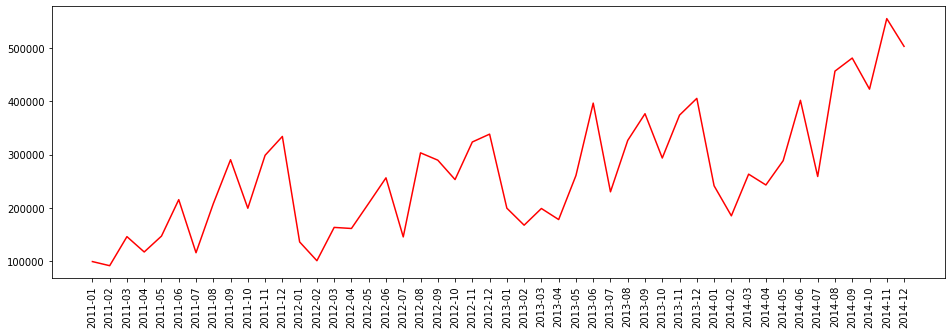

In [57]:
plt.figure(figsize=(16,5))
plt.plot(df_sales_trends.month_year,df_sales_trends.sales,c='r')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Conclusion - In first 4-5 months sales in low for all the years but after may sales has 
# increased. Overall company is growing

### Q2. Which are top 10 products by sales?

In [59]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year'],
      dtype='object')

In [65]:
df["product_name"].value_counts()

Staples                                                                      227
Cardinal Index Tab, Clear                                                     92
Eldon File Cart, Single Width                                                 90
Rogers File Cart, Single Width                                                84
Ibico Index Tab, Clear                                                        83
                                                                            ... 
Xerox Blank Computer Paper                                                     1
Panasonic KX MB2061 Multifunction Printer                                      1
Grip Seal Envelopes                                                            1
Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate      1
Acco Glide Clips                                                               1
Name: product_name, Length: 3788, dtype: int64

In [67]:
prod_sales=pd.DataFrame(df.groupby("product_name").sum()['sales'])

In [68]:
prod_sales.head()

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672


In [69]:
prod_sales=prod_sales.sort_values(by=['sales'],ascending=False)

In [70]:
prod_sales

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
...,...
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.7000
Grip Seal Envelopes,7.0720
Xerox 20,6.4800


In [71]:
prod_sales.head(10)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


In [72]:
# These are top 10 products by sales

### Q3. Which are the most selling products(quantity)?

In [73]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year'],
      dtype='object')

In [76]:
df_best_selling_products=pd.DataFrame(df.groupby("product_name").sum()['quantity'])

In [77]:
df_best_selling_products.head()

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8.0
"#10 Gummed Flap White Envelopes, 100/Box",11.0
#10 Self-Seal White Envelopes,10.0
"#10 White Business Envelopes,4 1/8 x 9 1/2",32.0
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37.0


In [78]:
df_best_selling_products= df_best_selling_products.sort_values(by=['quantity'],ascending=False)

In [80]:
df_best_selling_products.head(10)

,quantity
product_name,
Staples,876.0
"Cardinal Index Tab, Clear",337.0
"Eldon File Cart, Single Width",321.0
"Rogers File Cart, Single Width",262.0
"Sanford Pencil Sharpener, Water Color",259.0
"Stockwell Paper Clips, Assorted Sizes",253.0
"Avery Index Tab, Clear",252.0
"Ibico Index Tab, Clear",251.0
"Smead File Cart, Single Width",250.0


### Q4. Which is most preferred shiping method?

In [81]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year'],
      dtype='object')

In [82]:
df.ship_mode.unique()

array(['Standard Class', 'Second Class', 'Same Day', 'First Class'],
      dtype=object)

In [83]:
import seaborn as sns

<AxesSubplot:xlabel='ship_mode', ylabel='count'>

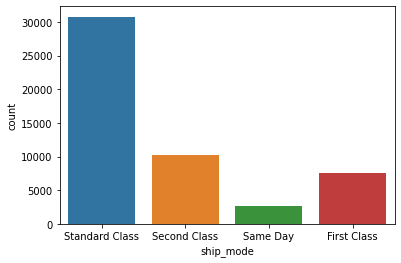

In [84]:
sns.countplot(x="ship_mode",data=df)

In [85]:
## From this analysis, we can ssay consumers are preferring standard shipping class

### Q5. Which are the most profitable categories and sub categories?

In [89]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year'],
      dtype='object')

In [90]:
df.groupby(['category','sub_category']).sum()['profit']

category         sub_category
Furniture        Bookcases       161924.41950
                 Chairs          141973.79750
                 Furnishings      46967.42550
                 Tables          -64083.38870
Office Supplies  Appliances      141680.58940
                 Art              57953.91090
                 Binders          72449.84600
                 Envelopes        29601.11630
                 Fasteners        11525.42410
                 Labels           15010.51200
                 Paper            59207.68270
                 Storage         108461.48980
                 Supplies         22583.26310
Technology       Accessories     129626.30620
                 Copiers         258567.54818
                 Machines         58867.87300
                 Phones          216717.00580
Name: profit, dtype: float64

In [92]:
df.category.unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [94]:
df.sub_category.unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Machines',
       'Appliances', 'Copiers', 'Chairs', 'Tables', 'Bookcases', 'Phones',
       'Accessories', 'Labels', 'Art', 'Envelopes', 'Fasteners',
       'Binders'], dtype=object)

In [95]:
df_cat_subcate_profit=pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])

In [96]:
df_cat_subcate_profit

profit
category        sub_category              
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870
Office Supplies Appliances    141680.58940
                Art            57953.91090
                Binders        72449.84600
                Envelopes      29601.11630
                Fasteners      11525.42410
                Labels         15010.51200
                Paper          59207.68270
                Storage       108461.48980
                Supplies       22583.26310
Technology      Accessories   129626.30620
                Copiers       258567.54818
                Machines       58867.87300
                Phones        216717.00580

In [99]:
df_cat_subcate_profit.sort_values(by=["category","profit"],ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

In [100]:
# Equipments from technology is selling more and 
# In technology -> Copiers
# Office Supplies -> appliances
# Furniture -> Bookcases

### Q6. Which are the least profitable categories and sub categories?

In [101]:
df_cat_subcate_profit.sort_values(by=["category","profit"],ascending=True)

profit
category        sub_category              
Furniture       Tables        -64083.38870
                Furnishings    46967.42550
                Chairs        141973.79750
                Bookcases     161924.41950
Office Supplies Fasteners      11525.42410
                Labels         15010.51200
                Supplies       22583.26310
                Envelopes      29601.11630
                Art            57953.91090
                Paper          59207.68270
                Binders        72449.84600
                Storage       108461.48980
                Appliances    141680.58940
Technology      Machines       58867.87300
                Accessories   129626.30620
                Phones        216717.00580
                Copiers       258567.54818

### Q7. Which are bottom 10 products by sales?

In [103]:
prod_sales.tail(10)

,sales
product_name,
Newell 308,8.400
Stockwell Gold Paper Clips,8.096
4009 Highlighters,8.040
Xerox 1989,7.968
"Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink",7.800
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.700
Grip Seal Envelopes,7.072
Xerox 20,6.480
Avery 5,5.760


### Q8. Which are the least selling products(quantity)?

In [104]:
df_best_selling_products.tail(10)

,quantity
product_name,
Avery 5,2.0
NeatDesk Desktop Scanner & Digital Filing System,2.0
Hewlett-Packard Deskjet F4180 All-in-One Color Ink-jet - Printer / copier / scanner,2.0
Ultra Commercial Grade Dual Valve Door Closer,2.0
"Chromcraft Training Table, Adjustable Height",1.0
Penpower WorldCard Pro Card Scanner,1.0
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1.0
Boston 1900 Electric Pencil Sharpener,1.0
Xerox 20,1.0


### Q9. In which year we got more order

In [86]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='count'>

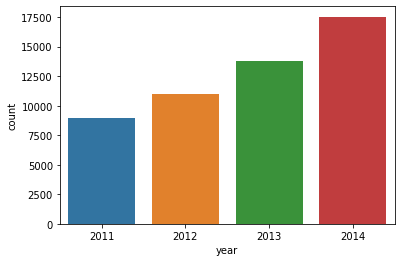

In [87]:
sns.countplot(x="year",data=df)

In [88]:
# so we have more orders in 2014

In [105]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year'],
      dtype='object')

### Q10. Find out from wqhich country we got more orders


Exception ignored in: <function ZipFile.__del__ at 0x7f072b092160>
Traceback (most recent call last):
  File "/usr/lib/python3.8/zipfile.py", line 1821, in __del__
    self.close()
  File "/usr/lib/python3.8/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


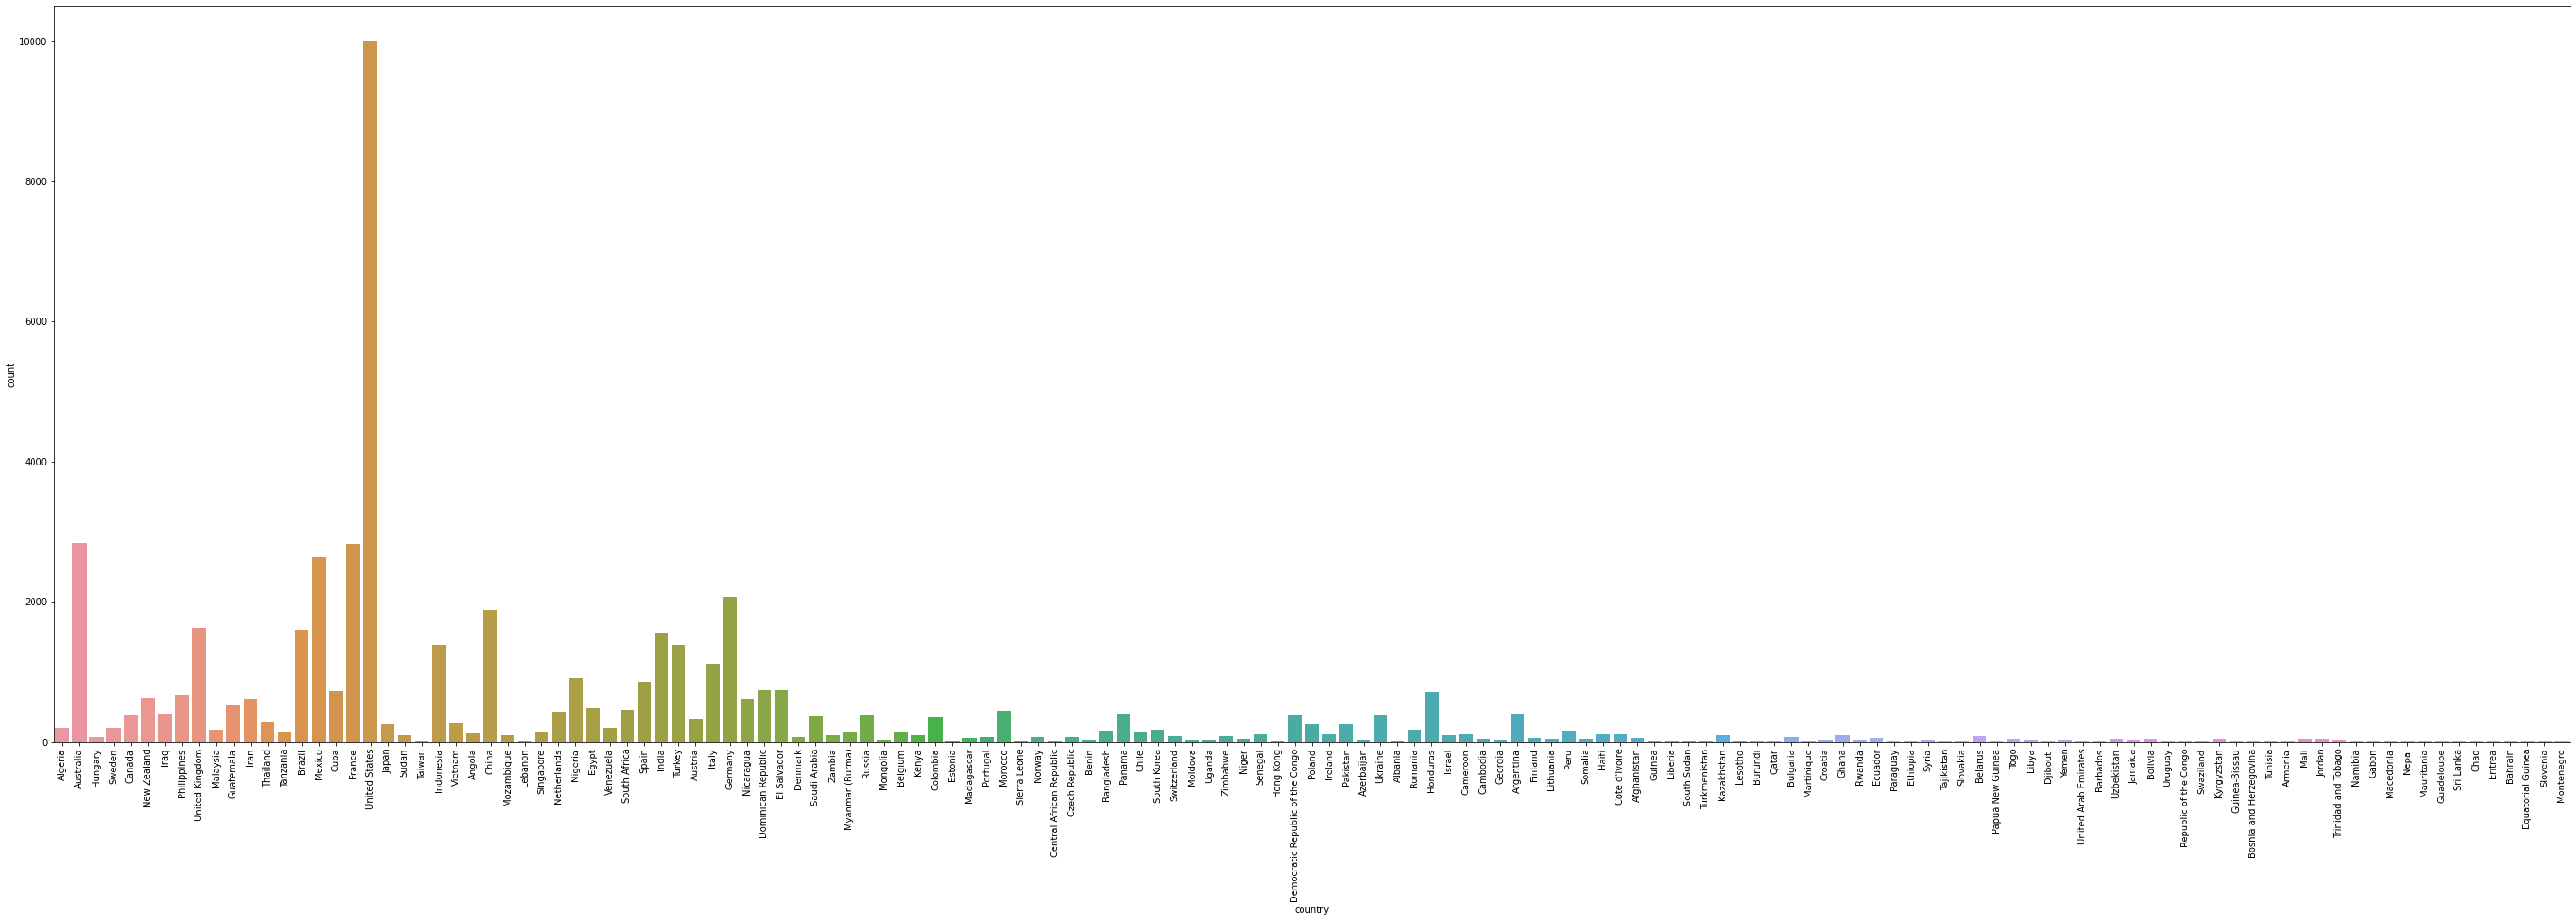

In [110]:
plt.figure(figsize=(50,15))
sns.countplot(x="country",data=df)
plt.xticks(rotation="vertical")
plt.show()

### Q11. How much is average discount given


In [111]:
df.discount.mean()

0.14290754533047378

### Q12. Tell us the total profit of our company

In [112]:
df.profit.sum()

1469034.8212799998